In [4]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install pygeos
!pip install topojson
!pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 53.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.4 MB/s eta 0:00:00:00:010:01


In [48]:
import requests
!pip install rarfile
import rarfile
from io import BytesIO # pour stocker dans la memoire
import os
import shutil

url = "https://geoportal.dane.gov.co/descargas/mgn_2021/MGN2021_DPTO_POLITICO.rar"
rar_filename = "MGN2021_DPTO_POLITICO.rar"
extracted_folder = "extracted_files"

# Download the .rar file
response = requests.get(url)

if response.status_code == 200:
    # Create the folder to extract files into
    os.makedirs(extracted_folder, exist_ok=True)

    # Extract all contents of the .rar file
    with rarfile.RarFile(BytesIO(response.content)) as rf:
        for file_info in rf.infolist():
            try:
                # Extract each file
                rf.extract(file_info, extracted_folder)
                print(f"File '{file_info.filename}' extracted successfully.")
            except rarfile.BadRarFile as e:
                print(f"Error extracting '{file_info.filename}': {e}")
                # Optionally, you can choose to log the error or take other actions

else:
    print(f"Failed to download the .rar file. Status code: {response.status_code}")

File 'MGN_DPTO_POLITICO.cpg' extracted successfully.
Error extracting 'MGN_DPTO_POLITICO.dbf': Failed the read enough data: req=14281 got=51
Error extracting 'MGN_DPTO_POLITICO.prj': Failed the read enough data: req=139 got=51
Error extracting 'MGN_DPTO_POLITICO.sbn': Failed the read enough data: req=484 got=51
Error extracting 'MGN_DPTO_POLITICO.sbx': Failed the read enough data: req=164 got=51
Error extracting 'MGN_DPTO_POLITICO.shp': Failed the read enough data: req=65536 got=51
Error extracting 'MGN_DPTO_POLITICO.shp.xml': Failed the read enough data: req=65536 got=51
Error extracting 'MGN_DPTO_POLITICO.shx': Failed the read enough data: req=364 got=51


In [1]:
import requests
import zipfile
import io
import os

%cd /home/onyxia/work/monocentric-model-colombia-2021

# URL of the zip file
zip_url = "https://www.dane.gov.co/files/geoportal-provisional/SHP_MGN2018_INTGRD_DEPTO.zip"

# Directory where you want to save the downloaded and extracted files
download_dir = "downloaded_folder"

# Create the directory if it doesn't exist
os.makedirs(download_dir, exist_ok=True)

# Download the zip file
response = requests.get(zip_url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extract the contents of the zip file to the specified directory
zip_file.extractall(download_dir)

/home/onyxia/work/monocentric-model-colombia-2021


In [5]:
import numpy as np  # Importe la bibliothèque NumPy sous l'alias np
import pandas as pd  # Importe la bibliothèque Pandas sous l'alias pd
import geopandas as gpd  # Importe la bibliothèque GeoPandas sous l'alias gpd
import contextily as ctx  # Importe la bibliothèque Contextily sous l'alias ctx
import geoplot  # Importe la bibliothèque GeoPlot
import matplotlib.pyplot as plt  # Importe le sous-module pyplot de Matplotlib sous l'alias plt
import folium  # Importe la bibliothèque Folium

%cd /home/onyxia/work/monocentric-model-colombia-2021

# Chemin du fichier au format Stata à lire
chemin_dta = "/home/onyxia/work/monocentric-model-colombia-2021/data_base_enrichie_totalement_clean.dta"

# Lecture du fichier Stata et stockage des données dans un DataFrame nommé 'c'
c = pd.read_stata(chemin_dta)

# Affichage des dix premières lignes du DataFrame 'c'
c

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


/home/onyxia/work/monocentric-model-colombia-2021


,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,P6016,gender,P6030S1,P6030S3,age,...,own_status,territory,rent_reel,log_rent_reel,rent_reel_uc,log_rent_reel_uc,imputed_rent,log_imputed_rent,imputed_rent_uc,log_imputed_rent_uc
0,6037206.0,1.0,1.0,1.0,10,1.0,1.0,1.0,1963.0,58.0,...,0,2,800000.0,13.592367,565685.424949,13.245793,800000.0,13.592367,565685.424949,13.245793
1,6037207.0,1.0,1.0,1.0,10,1.0,1.0,1.0,1979.0,42.0,...,0,2,750000.0,13.527828,283473.354757,12.554873,750000.0,13.527828,283473.354757,12.554873
2,6037209.0,1.0,1.0,1.0,10,1.0,2.0,11.0,1977.0,44.0,...,0,2,700000.0,13.458836,494974.746831,13.112262,700000.0,13.458836,494974.746831,13.112262
3,6037210.0,1.0,1.0,1.0,10,1.0,1.0,8.0,1972.0,49.0,...,0,2,750000.0,13.527828,433012.701892,12.978522,750000.0,13.527828,433012.701892,12.978522
4,6037211.0,1.0,1.0,1.0,10,1.0,2.0,8.0,1986.0,35.0,...,0,2,740000.0,13.514405,427239.199200,12.965099,740000.0,13.514405,427239.199200,12.965099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,6062932.0,1.0,1.0,1.0,10,1.0,2.0,6.0,1965.0,56.0,...,0,7,200000.0,12.206073,200000.000000,12.206073,200000.0,12.206073,200000.000000,12.206073
18135,6062935.0,1.0,1.0,1.0,10,1.0,2.0,6.0,1981.0,40.0,...,1,7,NaN,NaN,NaN,NaN,250000.0,12.429216,144337.567297,11.879910
18136,6062936.0,1.0,1.0,1.0,10,1.0,1.0,5.0,1961.0,60.0,...,1,7,NaN,NaN,NaN,NaN,80000.0,11.289782,40000.000000,10.596635
18137,6062950.0,1.0,1.0,1.0,10,1.0,1.0,2.0,1995.0,26.0,...,1,7,NaN,NaN,NaN,NaN,150000.0,11.918391,106066.017178,11.571817


/home/onyxia/work/monocentric-model-colombia-2021/downloaded_folder


,DPTO_CCDGO,DPTO_CNMBR,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,STP3_2_NO,STP3A_RI,...,STP34_9_ED,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,geometry
13,05,ANTIOQUIA,2018,6.280471e+10,6.922796,-75.564988,2831531.0,7857.0,2823674.0,5091.0,...,130816.0,1730299.0,2402800.0,1050842.0,146248.0,222981.0,76285.0,21.443760,5.134915,"POLYGON ((-76.41355 8.87383, -76.40465 8.85195..."
32,08,ATLÃNTICO,2018,3.315752e+09,10.677010,-74.965219,753414.0,0.0,753414.0,0.0,...,45728.0,562823.0,986492.0,472743.0,43076.0,69822.0,27396.0,2.540635,0.273930,"POLYGON ((-74.84946 11.09778, -74.84938 11.097..."
27,11,"BOGOTÃ, D.C.",2018,1.622853e+09,4.316108,-74.181073,2737495.0,0.0,2737495.0,0.0,...,138673.0,1443711.0,2682119.0,1953893.0,416430.0,111390.0,161781.0,3.760453,0.132208,"POLYGON ((-74.07419 4.83655, -74.07401 4.83647..."
17,13,BOLÃVAR,2018,2.671920e+10,8.745271,-74.508643,705254.0,7548.0,697706.0,0.0,...,35911.0,557339.0,764942.0,275803.0,23473.0,107699.0,18865.0,16.235823,2.195576,"MULTIPOLYGON (((-76.17318 9.38785, -76.17287 9..."
24,15,BOYACÃ,2018,2.313805e+10,5.776607,-73.102073,967834.0,1419.0,966415.0,1419.0,...,31047.0,402851.0,399283.0,159985.0,34895.0,49528.0,16598.0,15.906491,1.888391,"POLYGON ((-72.17368 7.05308, -72.17277 7.05224..."
10,17,CALDAS,2018,7.425222e+09,5.342066,-75.306879,485640.0,11689.0,473951.0,11689.0,...,25782.0,305201.0,358112.0,140519.0,24516.0,36039.0,9771.0,6.655844,0.605498,"POLYGON ((-74.67154 5.77147, -74.67054 5.76896..."
0,18,CAQUETÃ,2018,9.010301e+10,0.798556,-73.959468,163381.0,1117.0,162264.0,1117.0,...,4885.0,139145.0,126283.0,30474.0,6130.0,17844.0,10238.0,21.384287,7.318485,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852..."
1,19,CAUCA,2018,3.124291e+10,2.396834,-76.824233,622959.0,83033.0,539926.0,70827.0,...,25952.0,479582.0,449016.0,126327.0,18944.0,56673.0,17057.0,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870..."
18,20,CESAR,2018,2.256234e+10,9.536660,-73.517832,414890.0,7232.0,407658.0,7232.0,...,14846.0,334975.0,408439.0,151405.0,14177.0,72536.0,13869.0,12.611247,1.857960,"POLYGON ((-73.45374 10.86767, -73.45358 10.867..."
16,23,CÃRDOBA,2018,2.508655e+10,8.358550,-75.792009,601587.0,9611.0,591976.0,9611.0,...,30375.0,493292.0,586526.0,189689.0,18724.0,129392.0,13610.0,9.691516,2.057533,"POLYGON ((-75.91797 9.44406, -75.91791 9.44348..."


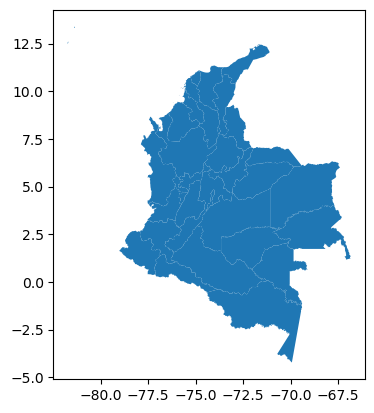

In [6]:
import geopandas as gpd  

%cd /home/onyxia/work/monocentric-model-colombia-2021/downloaded_folder

gdf = gpd.read_file("MGN_ANM_DPTOS.shp")
gdf.plot()

gdf_sorted = gdf.sort_values(by='DPTO_CCDGO')
gdf_sorted #pour voir quels departements ils ont par rapport a notre base
#on a plus de departements dans le shapefile que dans notre base de donnees. on va devoir modifier les polygones
#mieux : on va modifier les polygones pour avoir notre typologie en territoire

In [29]:
gdf = gdf.rename(columns={'DPTO_CCDGO': 'DPTO'})
gdf

,DPTO,DPTO_CNMBR,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,STP3_2_NO,STP3A_RI,...,STP34_9_ED,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,geometry
0,18,CAQUETÃ,2018,9.010301e+10,0.798556,-73.959468,163381.0,1117.0,162264.0,1117.0,...,4885.0,139145.0,126283.0,30474.0,6130.0,17844.0,10238.0,21.384287,7.318485,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852..."
1,19,CAUCA,2018,3.124291e+10,2.396834,-76.824233,622959.0,83033.0,539926.0,70827.0,...,25952.0,479582.0,449016.0,126327.0,18944.0,56673.0,17057.0,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870..."
2,86,PUTUMAYO,2018,2.597628e+10,0.452260,-75.855912,147797.0,4704.0,143093.0,4659.0,...,3756.0,104699.0,107564.0,27821.0,4283.0,11058.0,5630.0,12.707922,2.107965,"POLYGON ((-76.67050 1.46732, -76.67000 1.46730..."
3,76,VALLE DEL CAUCA,2018,2.066554e+10,3.858858,-76.518694,1674673.0,18250.0,1656423.0,3618.0,...,101105.0,1012179.0,1616067.0,699312.0,83581.0,111703.0,49860.0,12.650870,1.679487,"MULTIPOLYGON (((-77.23810 4.04049, -77.23774 4..."
4,94,GUAINÃA,2018,7.128935e+10,2.727843,-68.816613,13059.0,3675.0,9384.0,3675.0,...,241.0,20076.0,12369.0,2819.0,461.0,2545.0,1886.0,21.179051,5.747937,"POLYGON ((-67.67638 3.91228, -67.67305 3.90931..."
5,99,VICHADA,2018,1.000634e+11,4.713557,-69.414000,24915.0,6870.0,18045.0,6870.0,...,483.0,31488.0,20437.0,4055.0,573.0,6874.0,3657.0,17.292613,8.100680,"POLYGON ((-67.80972 6.32432, -67.80946 6.32432..."
6,85,CASANARE,2018,4.439424e+10,5.404064,-71.601881,200495.0,1324.0,199171.0,1324.0,...,4138.0,129130.0,146374.0,46073.0,6900.0,14502.0,5762.0,12.132754,3.615063,"POLYGON ((-72.33885 6.34471, -72.33920 6.34454..."
7,91,AMAZONAS,2018,1.094971e+11,-1.546228,-71.502129,21728.0,5008.0,16720.0,5008.0,...,466.0,20903.0,27075.0,5118.0,723.0,2037.0,3127.0,25.355977,8.877480,"POLYGON ((-71.14469 0.05572, -71.14508 0.05349..."
8,97,VAUPÃS,2018,5.329928e+10,0.646246,-70.561406,8008.0,4332.0,3676.0,4332.0,...,244.0,16705.0,12162.0,1791.0,336.0,1848.0,1668.0,20.129834,4.313810,"POLYGON ((-70.11033 2.08010, -70.10981 2.08002..."
9,95,GUAVIARE,2018,5.557523e+10,1.924532,-72.128596,34687.0,1429.0,33258.0,1429.0,...,642.0,28201.0,24632.0,6937.0,1116.0,3437.0,3515.0,19.396789,4.511457,"POLYGON ((-71.31266 2.92463, -71.31215 2.92445..."


In [32]:
pwd

'/home/onyxia/work/monocentric-model-colombia-2021/downloaded_folder'

In [34]:
import pandas as pd

total_dataset_clean = pd.read_stata("/home/onyxia/work/monocentric-model-colombia-2021/data_base_enrichie_totalement_clean.dta") 


In [38]:
#par departement seulement 
grouped_data = total_dataset_clean.groupby('DPTO')['imputed_rent'].mean().reset_index()


In [39]:
grouped_data

,DPTO,imputed_rent
0,5,744371.848739
1,8,597523.644752
2,11,855316.589041
3,13,494650.127226
4,15,621417.218543
5,17,578759.493671
6,18,371486.013986
7,19,500478.119935
8,20,502881.756757
9,23,520837.696335


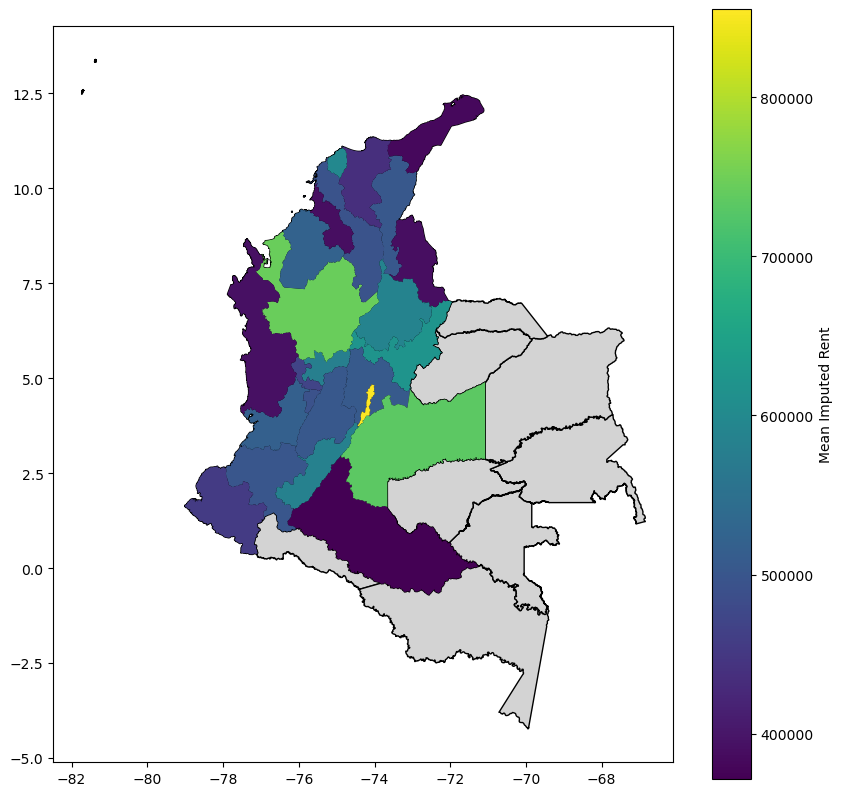

In [47]:
carte_imputedrent_nofex = pd.merge(gdf, grouped_data, on='DPTO', how='left')
carte_imputedrent_nofex
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
carte_imputedrent_nofex.plot(ax=ax, column='imputed_rent', cmap='viridis', legend=True, legend_kwds={'label': "Mean Imputed Rent"})
plt.show()


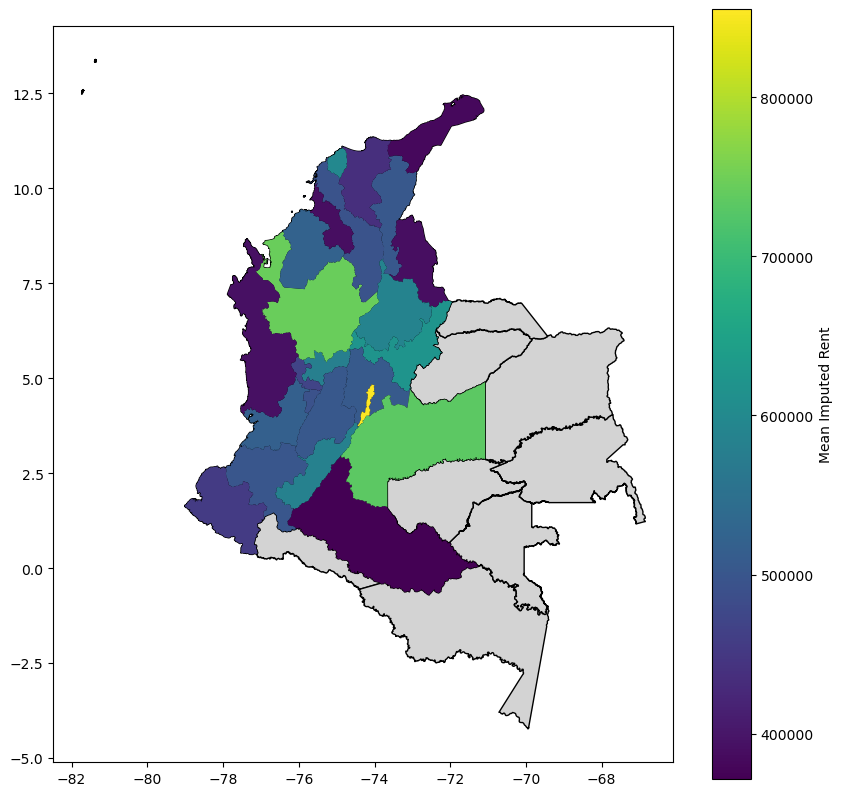

In [52]:
#par categorie territory // on voit qu'on garde les memes couleurs donc on a une classification bien homogene !

grouped_data = total_dataset_clean.groupby('territory')['imputed_rent'].mean().reset_index()
unique_pairs = total_dataset_clean[['territory', 'DPTO']].drop_duplicates()
grouped_data = pd.merge(unique_pairs, grouped_data, on='territory', how='left')
carte_imputedrent_nofex_territory = pd.merge(gdf, grouped_data, on='DPTO', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
carte_imputedrent_nofex.plot(ax=ax, column='imputed_rent', cmap='viridis', legend=True, legend_kwds={'label': "Mean Imputed Rent"})
plt.show()

In [ ]:
faire ensuite avec les reg 

In [ ]:
liste_dpto_shp = gdf_sorted[['DPTO_CCDGO','DPTO_CNMBR']]
liste_dpto_shp

In [ ]:
DPTO_vars = c['DPTO'].unique() #je cree un array avec les DPTO uniques 
DPTO_vars = pd.DataFrame({'DPTO': DPTO_vars}) #que je transforme en vecteur colonne
DPTO_vars.sort_values(by='DPTO').T

In [9]:
# on fait une jointure left_join

liste_dpto_shp = liste_dpto_shp.rename(columns={'DPTO_CCDGO': 'DPTO'})
liste_dpto_shp['DPTO'] = pd.to_numeric(liste_dpto_shp['DPTO'], errors='coerce')

DPTO_vars['vide']=1

liste_dpto_df_shp = pd.merge(liste_dpto_shp, DPTO_vars, on='DPTO', how='outer')
liste_dpto_df_shp

,DPTO,DPTO_CNMBR,vide
0,5,ANTIOQUIA,1.0
1,8,ATLÃNTICO,1.0
2,11,"BOGOTÃ, D.C.",1.0
3,13,BOLÃVAR,1.0
4,15,BOYACÃ,1.0
5,17,CALDAS,1.0
6,18,CAQUETÃ,1.0
7,19,CAUCA,1.0
8,20,CESAR,1.0
9,23,CÃRDOBA,1.0


In [95]:
de 81 a 99, on n'a pas de dept dans la base #pas grave, on va simplement pas les mapper, vu qu'on a pas de donnees dessus


SyntaxError: unterminated string literal (detected at line 1) (1452853225.py, line 1)

In [28]:
gdf = gdf.rename(columns={'DPTO_CCDGO': 'DPTO'})
gdf

,DPTO,DPTO_CNMBR,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,STP3_2_NO,STP3A_RI,...,STP34_9_ED,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,geometry
0,18,CAQUETÃ,2018,9.010301e+10,0.798556,-73.959468,163381.0,1117.0,162264.0,1117.0,...,4885.0,139145.0,126283.0,30474.0,6130.0,17844.0,10238.0,21.384287,7.318485,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852..."
1,19,CAUCA,2018,3.124291e+10,2.396834,-76.824233,622959.0,83033.0,539926.0,70827.0,...,25952.0,479582.0,449016.0,126327.0,18944.0,56673.0,17057.0,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870..."
2,86,PUTUMAYO,2018,2.597628e+10,0.452260,-75.855912,147797.0,4704.0,143093.0,4659.0,...,3756.0,104699.0,107564.0,27821.0,4283.0,11058.0,5630.0,12.707922,2.107965,"POLYGON ((-76.67050 1.46732, -76.67000 1.46730..."
3,76,VALLE DEL CAUCA,2018,2.066554e+10,3.858858,-76.518694,1674673.0,18250.0,1656423.0,3618.0,...,101105.0,1012179.0,1616067.0,699312.0,83581.0,111703.0,49860.0,12.650870,1.679487,"MULTIPOLYGON (((-77.23810 4.04049, -77.23774 4..."
4,94,GUAINÃA,2018,7.128935e+10,2.727843,-68.816613,13059.0,3675.0,9384.0,3675.0,...,241.0,20076.0,12369.0,2819.0,461.0,2545.0,1886.0,21.179051,5.747937,"POLYGON ((-67.67638 3.91228, -67.67305 3.90931..."
5,99,VICHADA,2018,1.000634e+11,4.713557,-69.414000,24915.0,6870.0,18045.0,6870.0,...,483.0,31488.0,20437.0,4055.0,573.0,6874.0,3657.0,17.292613,8.100680,"POLYGON ((-67.80972 6.32432, -67.80946 6.32432..."
6,85,CASANARE,2018,4.439424e+10,5.404064,-71.601881,200495.0,1324.0,199171.0,1324.0,...,4138.0,129130.0,146374.0,46073.0,6900.0,14502.0,5762.0,12.132754,3.615063,"POLYGON ((-72.33885 6.34471, -72.33920 6.34454..."
7,91,AMAZONAS,2018,1.094971e+11,-1.546228,-71.502129,21728.0,5008.0,16720.0,5008.0,...,466.0,20903.0,27075.0,5118.0,723.0,2037.0,3127.0,25.355977,8.877480,"POLYGON ((-71.14469 0.05572, -71.14508 0.05349..."
8,97,VAUPÃS,2018,5.329928e+10,0.646246,-70.561406,8008.0,4332.0,3676.0,4332.0,...,244.0,16705.0,12162.0,1791.0,336.0,1848.0,1668.0,20.129834,4.313810,"POLYGON ((-70.11033 2.08010, -70.10981 2.08002..."
9,95,GUAVIARE,2018,5.557523e+10,1.924532,-72.128596,34687.0,1429.0,33258.0,1429.0,...,642.0,28201.0,24632.0,6937.0,1116.0,3437.0,3515.0,19.396789,4.511457,"POLYGON ((-71.31266 2.92463, -71.31215 2.92445..."


In [39]:
# Ajout d'une colonne 'coord' à partir de sélections spécifiques de géométries du GeoDataFrame 'gdf'
corr_gps['coord'] = (
    gdf.iloc[1]['geometry'],        # Sélection de la géométrie à l'index 1 dans 'gdf'
    gdf.iloc[2]['geometry'],        # Sélection de la géométrie à l'index 2 dans 'gdf'
    gdf.iloc[3]['geometry'],        # Sélection de la géométrie à l'index 3 dans 'gdf'
    gdf.iloc[4]['geometry'],        # Sélection de la géométrie à l'index 4 dans 'gdf'
    gdf.iloc[6]['geometry'],        # Sélection de la géométrie à l'index 6 dans 'gdf'
    gdf.iloc[10]['geometry'],       # Sélection de la géométrie à l'index 10 dans 'gdf'
    gdf.iloc[16]['geometry'],       # Sélection de la géométrie à l'index 16 dans 'gdf'
    gdf.iloc[17]['geometry'],       # Sélection de la géométrie à l'index 17 dans 'gdf'
    gdf.iloc[18]['geometry'],       # Sélection de la géométrie à l'index 18 dans 'gdf'
    gdf.iloc[20]['geometry'],       # Sélection de la géométrie à l'index 20 dans 'gdf'
    gdf.iloc[21]['geometry'],       # Sélection de la géométrie à l'index 21 dans 'gdf'
    gdf.iloc[23]['geometry'],       # Sélection de la géométrie à l'index 23 dans 'gdf'
    gdf.iloc[24]['geometry']        # Sélection de la géométrie à l'index 24 dans 'gdf'
)

# Affichage du DataFrame 'corr_gps' contenant la colonne 'DPTO' et la colonne nouvellement ajoutée 'coord'
print(corr_gps)


ValueError: Length of values (13) does not match length of index (26)

In [18]:

# Fusionner les DataFrames sur la colonne 'DPTO'
c_new = pd.merge(c, corr_gps, on='DPTO')

# Afficher les 30 premières lignes du DataFrame final avec les coordonnées géospatiales
print(c_new.head(30))



    DIRECTORIO  SECUENCIA_P  ORDEN  HOGAR REGIS  P6016  gender  P6030S1  \
0    6037206.0          1.0    1.0    1.0    10    1.0     1.0      1.0   
1    6037207.0          1.0    1.0    1.0    10    1.0     1.0      1.0   
2    6037209.0          1.0    1.0    1.0    10    1.0     2.0     11.0   
3    6037210.0          1.0    1.0    1.0    10    1.0     1.0      8.0   
4    6037211.0          1.0    1.0    1.0    10    1.0     2.0      8.0   
5    6037212.0          1.0    1.0    1.0    10    1.0     1.0      1.0   
6    6037213.0          1.0    1.0    1.0    10    1.0     2.0      2.0   
7    6037214.0          1.0    1.0    1.0    10    1.0     1.0      2.0   
8    6037215.0          1.0    1.0    1.0    10    1.0     2.0      9.0   
9    6037216.0          1.0    1.0    1.0    10    1.0     2.0     11.0   
10   6037217.0          1.0    1.0    1.0    10    1.0     1.0      3.0   
11   6037218.0          1.0    1.0    1.0    10    1.0     2.0     10.0   
12   6037219.0          1